In [3]:
import numpy             as np
import pandas            as pd
import geopandas         as gpd
import seaborn           as sns
import matplotlib.pyplot as plt
from shapely import geometry

In [8]:
path_data       = r"data/"
path_temp_media = path_data + r"temperatura/mean/"
path_temp_max   = path_data + r"temperatura/max/"
path_temp_min   = path_data + r"temperatura/min/"
path_lluvia     = path_data + r"lluvia/"
path_ind_UV     = path_data + r"indice_UV/"
path_hum_9      = path_data + r"humedad_relativa/hora9/"
path_hum_15     = path_data + r"humedad_relativa/hora15/"
path_hum_9      = path_data + r"humedad_relativa/hora9/"
path_expo_sol   = path_data + r"expo_sol/"
path_evotrans   = path_data + r"evapotranspiracion/"
path_evap       = path_data + r"evaporacion/"
path_dias_sol   = path_data + r"dias_sol/"
path_dias_lluv  = path_data + r"dias_lluvia/"
path_dias_helad = path_data + r"dias_helada/"

na_val = -9999

## Temp map metadata
t_ncols, t_nrows, t_x_corner, t_y_corner, t_cellsize = 1681, 1361, 112, -44, 0.025

In [9]:
temp_jan = pd.read_csv(path_temp_media+"meanjan.txt",
                       sep=" ",
                       skiprows=6,
                       header=None).iloc[:,:-1].replace(to_replace={na_val:np.nan})

<AxesSubplot:>

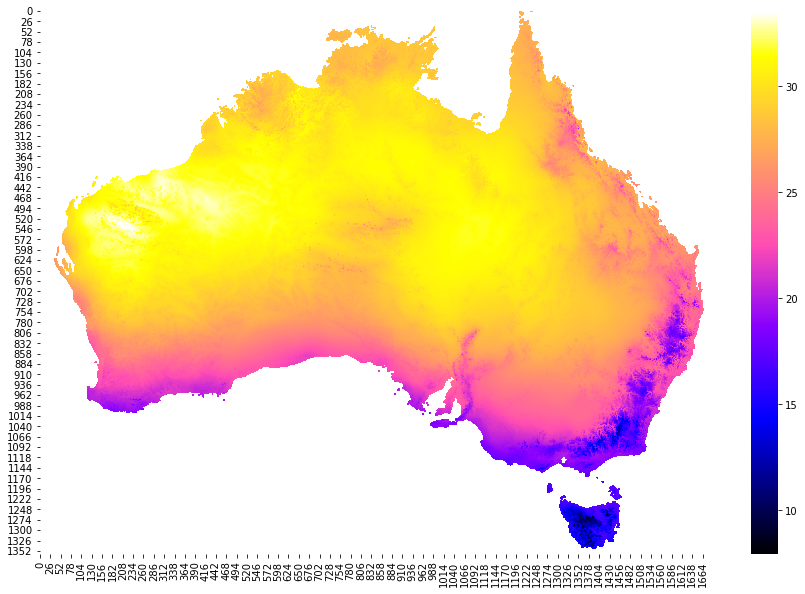

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(temp_jan,ax=ax,cmap='gnuplot2',mask=temp_jan.isnull())

In [11]:
x_inf = t_x_corner
x_sup = t_x_corner+t_ncols*t_cellsize

y_inf = t_y_corner
y_sup = t_y_corner+t_nrows*t_cellsize

In [12]:
temp_jan.shape

(1361, 1681)

In [13]:
scaledown = 3
ncols_out = round(1681/scaledown)
nrows_out = round(1361/scaledown)
cellsize_out = round(t_cellsize/3,4)

df_temp  = gpd.GeoDataFrame()

for index in range(ncols_out):
    print("Indice: " + str(index) + " de " + str(ncols_out))
    for row in range(nrows_out):
        ind = index*scaledown
        rw  = row*scaledown 
        if np.isnan(temp_jan.iloc[ind,rw]):
            continue
        x    = round(x_inf+(index*cellsize_out),3)
        y    = round(y_inf+(row*cellsize_out),3)
        p1   = geometry.Point(x,y)
        p2   = geometry.Point(x+cellsize_out,y)
        p3   = geometry.Point(x+cellsize_out,y+cellsize_out)
        p4   = geometry.Point(x,y+cellsize_out)
        poly = geometry.Polygon([p1, p2, p3, p4])
        df_temp = df_temp.append({'temp_jan':temp_jan.iloc[ind,rw],'geometry':poly}, ignore_index=True)

Indice: 0 de 560
Indice: 1 de 560
Indice: 2 de 560
Indice: 3 de 560
Indice: 4 de 560
Indice: 5 de 560
Indice: 6 de 560
Indice: 7 de 560
Indice: 8 de 560
Indice: 9 de 560
Indice: 10 de 560
Indice: 11 de 560
Indice: 12 de 560
Indice: 13 de 560
Indice: 14 de 560
Indice: 15 de 560
Indice: 16 de 560
Indice: 17 de 560
Indice: 18 de 560
Indice: 19 de 560
Indice: 20 de 560
Indice: 21 de 560
Indice: 22 de 560
Indice: 23 de 560
Indice: 24 de 560
Indice: 25 de 560
Indice: 26 de 560
Indice: 27 de 560
Indice: 28 de 560
Indice: 29 de 560
Indice: 30 de 560
Indice: 31 de 560
Indice: 32 de 560
Indice: 33 de 560
Indice: 34 de 560
Indice: 35 de 560
Indice: 36 de 560
Indice: 37 de 560
Indice: 38 de 560
Indice: 39 de 560
Indice: 40 de 560
Indice: 41 de 560
Indice: 42 de 560
Indice: 43 de 560
Indice: 44 de 560
Indice: 45 de 560
Indice: 46 de 560
Indice: 47 de 560
Indice: 48 de 560
Indice: 49 de 560
Indice: 50 de 560
Indice: 51 de 560
Indice: 52 de 560
Indice: 53 de 560
Indice: 54 de 560
Indice: 55 de 560
In

KeyboardInterrupt: 